# Exploratory Data Analysis of Flipkart Products by Surya Vamsi

- Flipkart is the largest Indian Ecommerce site. Started in 2007 by two ex Amazon employees, Sachin Bansal and Binny Bansal, Flipkart started off by selling books and eventually moving on to other goods, such as clothing, electronics and other consumables. For more information about Flipkart, check out there Wikipedia page. Courtesy to Promptcloud for making this dataset possible.

***

## Objectives

- What does data look like?
- How is the data pattern?
- What about missing values?
- Data Preparation for analysis
- Insights of Monthly Sales..
- Insights of discounts on products..
- Which categories were sold better?

***

# Importing Libraries & Data 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # for numerical analysis
import pandas as pd # For creation of Data Frames and some plots
import matplotlib.pyplot as plt # For plotting the points and graphs
import seaborn as sns # To visualize the amazingly in coloful patterns
# ♣ display all the visualization inside the notebook
%matplotlib inline

In [2]:
# Use Pandas.read_csv command to read the csv file
# Using df as an instance to store the dataframe
df = pd.read_csv('flipkart_product_prices.csv')

In [3]:
# The top 3 rows of data can be viewed using the command df.head(n=3)
df.head(n=3) # or df.head() for 5 elements defaultly

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."


In [4]:
# Read the name of columns using
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [5]:
# Check the information of each data column using
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
uniq_id                    20000 non-null object
crawl_timestamp            20000 non-null object
product_url                20000 non-null object
product_name               20000 non-null object
product_category_tree      20000 non-null object
pid                        20000 non-null object
retail_price               19922 non-null float64
discounted_price           19922 non-null float64
image                      19997 non-null object
is_FK_Advantage_product    20000 non-null bool
description                19998 non-null object
product_rating             20000 non-null object
overall_rating             20000 non-null object
brand                      14136 non-null object
product_specifications     19986 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 2.2+ MB


In [6]:
# This is how the shape of data look like
df.shape

(20000, 15)

In [7]:
# To check the no of null values & its percentage using
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

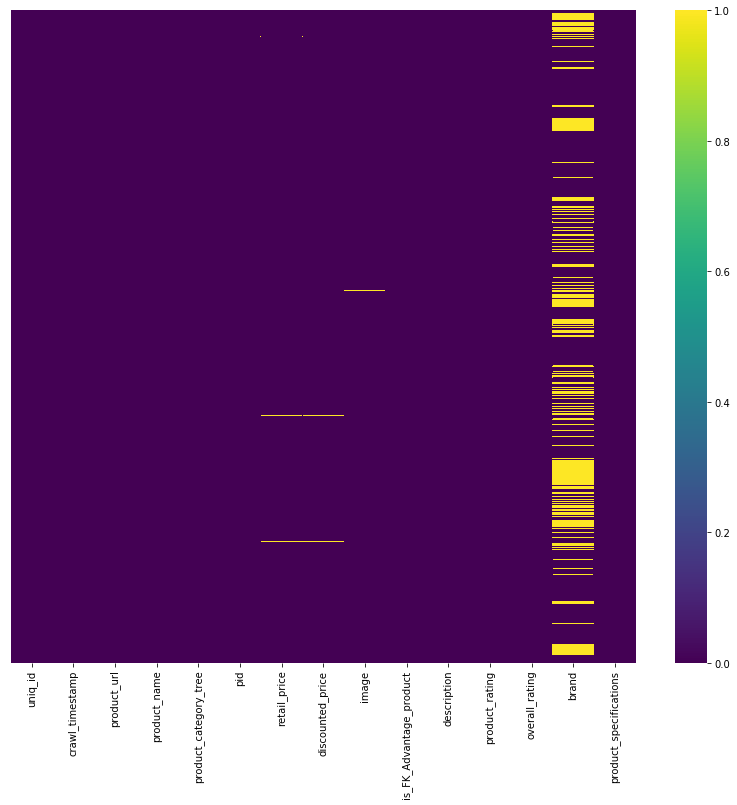

In [8]:
# let us visualize the missing data in percentages using basic numerical equation
data_missing = df.isnull().sum()*100/len(df)

# Type-1 of plotting the missing data
plt.figure(figsize=(14,12))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

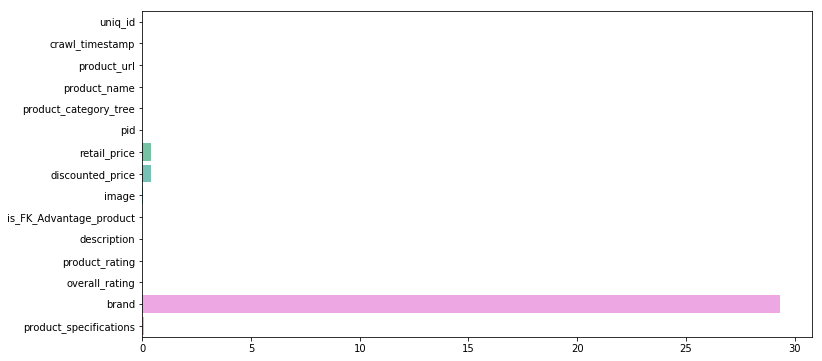

In [9]:
# Type - 2
# Plotting the missing data in a horizontal barplot
plt.figure(figsize=(12,6)) # To set the size of figure in the working cell
sns.barplot(data_missing.values, data_missing.index, alpha=0.75)

***

# 2. Data Preparation & Data Cleaning

- From the visualizations we have observed that there is a hefty of data missing in the Brand column
- Let us drop the brand column to avoid further barricades while analyzing the data

In [10]:
# Drop the column data from a dataframe using
df.drop(labels='brand', axis=1, inplace=True)

In [11]:
# Let us have a look at the head of dataframe again
df.head()
# Now we can see that brand column is no more available in the instance created

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Pet Type"",..."


- We will perform column study one by one to observe the patterns of data & claean it if required.

In [12]:
# Let us have a look at the uniqe values present in data
cols = df.columns
def Unique_Values():
    for i in np.arange(0,len(cols)):
        print('There are {} nos of unique values in {} column out of {}'.format(df[cols[i]].nunique(), cols[i], len(df)))
Unique_Values()

There are 20000 nos of unique values in uniq_id column out of 20000
There are 371 nos of unique values in crawl_timestamp column out of 20000
There are 20000 nos of unique values in product_url column out of 20000
There are 12676 nos of unique values in product_name column out of 20000
There are 6466 nos of unique values in product_category_tree column out of 20000
There are 19998 nos of unique values in pid column out of 20000
There are 2247 nos of unique values in retail_price column out of 20000
There are 2448 nos of unique values in discounted_price column out of 20000
There are 18589 nos of unique values in image column out of 20000
There are 2 nos of unique values in is_FK_Advantage_product column out of 20000
There are 17539 nos of unique values in description column out of 20000
There are 36 nos of unique values in product_rating column out of 20000
There are 36 nos of unique values in overall_rating column out of 20000
There are 18825 nos of unique values in product_specificat

### Column : 1

In [13]:
df['uniq_id'].nunique()/len(df)

1.0

- Column-1 : unique_id - there were no missing values of unique id

### Column : 2

In [14]:
df['crawl_timestamp'][0] # Look at the first element of this column data
# Let us convert this time stamp into year & month for analysis part as per our objective no 5

'2016-03-25 22:59:23 +0000'

In [15]:
#make this column into a datetime type for workability
df['crawl_timestamp'] = pd.to_datetime(df['crawl_timestamp'])

In [16]:
# Let us grab the year seperated by creating an another column & we will drop/utilize this timestamp later
df['sale_year'] = df['crawl_timestamp'].apply(lambda x: x.year)

In [17]:
# Let us grab the month seperated by creating an another column & we will drop/utilize this timestamp later
df['sale_month'] = df['crawl_timestamp'].apply(lambda x: x.month)

### Column : 4

In [18]:
df[cols[3]].value_counts()[:10]

TheLostPuppy Back Cover for Apple iPad Air                       134
TheLostPuppy Back Cover for Apple iPad Air 2                      95
S4S Stylish Women's Push-up Bra                                   94
Voylla Metal, Alloy Necklace                                      66
WallDesign Small Vinyl Sticker                                    65
HomeeHub Polyester Multicolor Self Design Eyelet Door Curtain     58
DailyObjects Back Cover for Apple iPad 2/3/4                      52
Nimya Solid Men's Polo Neck T-Shirt                               50
S4S Comfortable Women's Full Coverage Bra                         45
Grafion by Grafion - Comfort Feel Women's Full Coverage Bra       44
Name: product_name, dtype: int64

- The above are the top 10 products sold from the observed data

### Column 5

In [19]:
df['product_category_tree'][0]

'["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]'

- This is a bit tricky part of column data which consists of categories folowed by sub-categories
- This can easily splitted into sub-categories using split() command

In [20]:
# Let us define the categories initially to prepare a mockup later upto 3 sub categories
categories = ['Primary_Category', 'Secondary_Category', 'Tertiary_Category', 'Quaternary_Category']

In [21]:
# Apply a loop for Categorical Splits & add the categories into the Dataframe
def Categorcal_Splits():
    for num in [0,1,2,3]:
        if num == 0:
            df[categories[num]] = df['product_category_tree'].apply(lambda x: x.split('>>')[num])
        elif num == 1:
            df[categories[num]] = df['product_category_tree'].apply(lambda x: x.split('>>')[num:num+1])
        elif num == 2:
            df[categories[num]] = df['product_category_tree'].apply(lambda x: x.split('>>')[num:num+1])
        elif num == 3:
            df[categories[num]] = df['product_category_tree'].apply(lambda x: x.split('>>')[num:num+1])
Categorcal_Splits()

In [22]:
df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,sale_year,sale_month,Primary_Category,Secondary_Category,Tertiary_Category,Quaternary_Category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,"[""Clothing",[ Women's Clothing ],"[ Lingerie, Sleep & Swimwear ]",[ Shorts ]
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Installati...",2016,3,"[""Furniture",[ Living Room Furniture ],[ Sofa Beds & Futons ],[ FabHomeDecor Fabric Double Sofa Bed (Finish ...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,"[""Footwear",[ Women's Footwear ],[ Ballerinas ],"[ AW Bellies""]]"


### We can observe that the new category columns needs to be cleaned more

In [23]:
# Let us do it for columns seperately by defining a function
df['Primary_Category'] = df['Primary_Category'].apply(lambda x: x.split('["')[1])

In [24]:
# We can have a clean look at the primary_category now
df['Primary_Category'][:10]

0                                            Clothing 
1                                           Furniture 
2                                            Footwear 
3                                            Clothing 
4                                        Pet Supplies 
5    Eternal Gandhi Super Series Crystal Paper Weig...
6                                            Clothing 
7                                           Furniture 
8                                            Footwear 
9                                            Clothing 
Name: Primary_Category, dtype: object

In [25]:
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,sale_year,sale_month,Primary_Category,Secondary_Category,Tertiary_Category,Quaternary_Category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,[ Women's Clothing ],"[ Lingerie, Sleep & Swimwear ]",[ Shorts ]
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,[ Living Room Furniture ],[ Sofa Beds & Futons ],[ FabHomeDecor Fabric Double Sofa Bed (Finish ...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,[ Women's Footwear ],[ Ballerinas ],"[ AW Bellies""]]"
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,[ Women's Clothing ],"[ Lingerie, Sleep & Swimwear ]",[ Shorts ]
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,[ Grooming ],[ Skin & Coat Care ],[ Shampoo ]


In [26]:
for i in [1,2,3]:
    df[categories[i]] = df[categories[i]].apply(lambda x: str(x))
    df[categories[i]] = df[categories[i]].apply(lambda x: x[2:-2])

In [27]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,sale_year,sale_month,Primary_Category,Secondary_Category,Tertiary_Category,Quaternary_Category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies""]"
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo


In [28]:
df['Discount%'] = round((df['retail_price'] - df['discounted_price'])*100/df['retail_price'], 1)

In [29]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,product_specifications,sale_year,sale_month,Primary_Category,Secondary_Category,Tertiary_Category,Quaternary_Category,Discount%
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,62.1
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...,29.6
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies""]",50.1
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,61.8
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,4.5


- Lets Prepare a final data frame for Data Analysis

In [30]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'product_specifications', 'sale_year', 'sale_month',
       'Primary_Category', 'Secondary_Category', 'Tertiary_Category',
       'Quaternary_Category', 'Discount%'],
      dtype='object')

In [31]:
col_study = ['product_name','Primary_Category','retail_price','discounted_price','Discount%','sale_month','sale_year',
             'Secondary_Category','Tertiary_Category','Quaternary_Category',]
flipkart_df = df[col_study]

***

# 3. Data Visualization

In [32]:
# Head of our Dataframe
flipkart_df.head()

,product_name,Primary_Category,retail_price,discounted_price,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
0,Alisha Solid Women's Cycling Shorts,Clothing,999.0,379.0,62.1,3,2016,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,FabHomeDecor Fabric Double Sofa Bed,Furniture,32157.0,22646.0,29.6,3,2016,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...
2,AW Bellies,Footwear,999.0,499.0,50.1,3,2016,Women's Footwear,Ballerinas,"AW Bellies""]"
3,Alisha Solid Women's Cycling Shorts,Clothing,699.0,267.0,61.8,3,2016,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,220.0,210.0,4.5,3,2016,Grooming,Skin & Coat Care,Shampoo


## Let's take down the objectves to work

- What is the costliest produt sold?
- What is the cheapest product sold?
- Which product sold at highest discount?
- How are the discounts provided as per the categories?
- How are the sales distributed across the time period(yearly & monthly)?

****

####  Objective 1 : The Cheapest Product Sold

In [33]:
print("The cheapest product sold is Rs.{}".format(int(flipkart_df['discounted_price'].min())))

The cheapest product sold is Rs.35


In [34]:
flipkart_df[flipkart_df['discounted_price'] == flipkart_df['discounted_price'].min()]

,product_name,Primary_Category,retail_price,discounted_price,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
10554,Geol Wooden Wet and Dry Broom,Kitchen & Dining,35.0,35.0,0.0,4,2016,Housekeeping & Laundry,Home Cleaning,Brooms & Brushes


#### Objective 2 : The Costliest Product

In [35]:
print("The costliest product sold is Rs.{}".format(int(flipkart_df['discounted_price'].max())))

The costliest product sold is Rs.571230


In [36]:
flipkart_df[flipkart_df['discounted_price'] == flipkart_df['discounted_price'].max()]

,product_name,Primary_Category,retail_price,discounted_price,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
116,Breitling AB011010/BB08 131S Chronomat 44 Anal...,Watches,571230.0,571230.0,0.0,12,2015,Wrist Watches,"Breitling Wrist Watches""]",


#### Objective 3 : The product sold at highest discount

In [37]:
print("The highest discounted product sold at {}%".format(int(flipkart_df['Discount%'].max())))

The highest discounted product sold at 96%


In [38]:
flipkart_df[flipkart_df['Discount%'] == flipkart_df['Discount%'].max()]

,product_name,Primary_Category,retail_price,discounted_price,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
17205,Rajcrafts Floral Double Quilts & Comforters White,Home Furnishing,6000.0,208.0,96.5,12,2015,Bed Linen,"Blankets, Quilts & Dohars""]",


#### Objective 4 : Discounts provided as per Categories

- Let us check the categories of sold items

In [39]:
product_categories = df['Primary_Category'].value_counts()

In [40]:
product_categories = product_categories[:15]

Text(-0.9, 1.25, 'PIE Diagram for TOP 15 PRODUCT CATEGORIES')

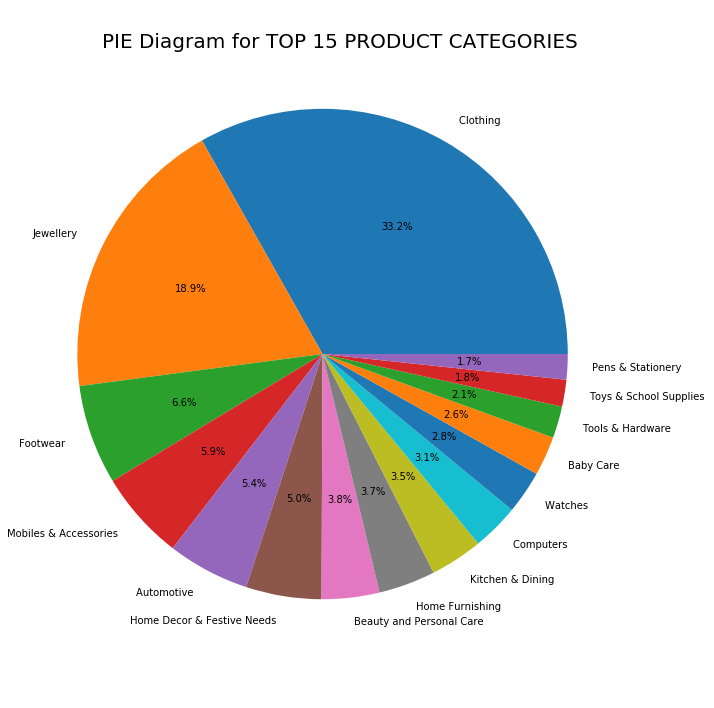

In [41]:
plt.figure(figsize=(10,10))
product_categories.plot.pie(y = product_categories.index, autopct='%1.1f%%')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.text(-0.9,1.25,'PIE Diagram for TOP 15 PRODUCT CATEGORIES', fontsize=20)

In [42]:
# Creating a Dataframe with grouping the categories to allocate mean and count using aggregate function
Primary_Category_Discounts = pd.DataFrame(flipkart_df.groupby('Primary_Category').agg({
    'Discount%': [np.mean],
    'Primary_Category': ['count']
}))

Secondary_Category_Discounts = pd.DataFrame(flipkart_df.groupby('Secondary_Category').agg({
    'Discount%': [np.mean],
    'Secondary_Category': ['count']
}))

Tertiary_Category_Discounts = pd.DataFrame(flipkart_df.groupby('Tertiary_Category').agg({
    'Discount%': [np.mean],
    'Tertiary_Category': ['count']
}))

Quaternary_Category_Discounts = pd.DataFrame(flipkart_df.groupby('Quaternary_Category').agg({
    'Discount%': [np.mean],
    'Quaternary_Category': ['count']
}))

In [43]:
Primary_Category_Discounts.head()

,Discount%,Primary_Category
,mean,count
Primary_Category,,
"883 Police Full Sleeve Solid Men's Jacket""]",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""]",27.6,1
"ANAND ARCHIES Girls Flats""]",10.0,2
"ANAND ARCHIES Girls Wedges""]",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""]",0.0,1


- We are going to club the multiindex for visualization

In [44]:
# Using a loop we will club Multi Index and Reset the Index
dis_cat = [Primary_Category_Discounts, Secondary_Category_Discounts,
           Tertiary_Category_Discounts, Quaternary_Category_Discounts]
for i in dis_cat:
    i.columns = ['-'.join(col) for col in i.columns]
    i.reset_index(inplace=True)

In [45]:
# Let us Consider top 15 categories from every Categories
# Lets sort by Category Count
Primary_Category_Discounts = Primary_Category_Discounts.sort_values(by='Primary_Category-count', ascending=False)[:15]
Secondary_Category_Discounts = Secondary_Category_Discounts.sort_values(by='Secondary_Category-count', ascending=False)[:15]
Tertiary_Category_Discounts = Tertiary_Category_Discounts.sort_values(by='Tertiary_Category-count', ascending=False)[:15]
Quaternary_Category_Discounts = Quaternary_Category_Discounts.sort_values(by='Quaternary_Category-count', ascending=False)[:15]

In [46]:
# Lets sort the values by Discounts Now
Primary_Category_Discounts = Primary_Category_Discounts.sort_values('Discount%-mean', ascending=False)
Secondary_Category_Discounts = Secondary_Category_Discounts.sort_values('Discount%-mean', ascending=False)
Tertiary_Category_Discounts = Tertiary_Category_Discounts.sort_values('Discount%-mean', ascending=False)
Quaternary_Category_Discounts = Quaternary_Category_Discounts.sort_values('Discount%-mean', ascending=False)

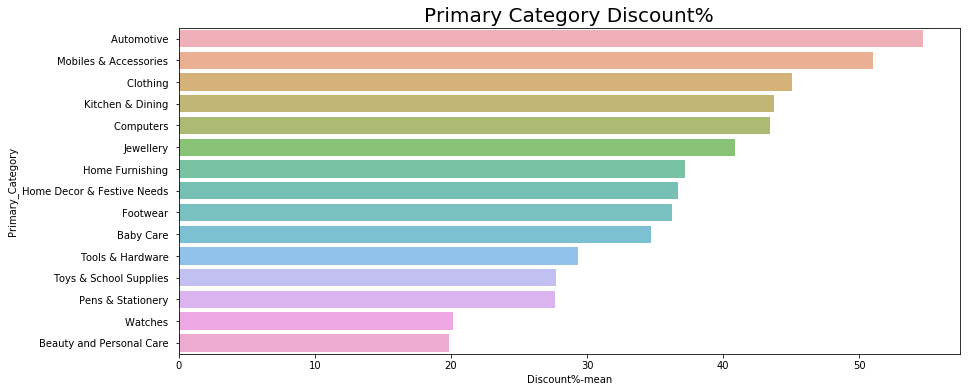

In [47]:
plt.figure(figsize=(14,6))
plt.title('Primary Category Discount%', fontsize=20)
sns.barplot(Primary_Category_Discounts['Discount%-mean'], Primary_Category_Discounts['Primary_Category'], alpha = 0.75)

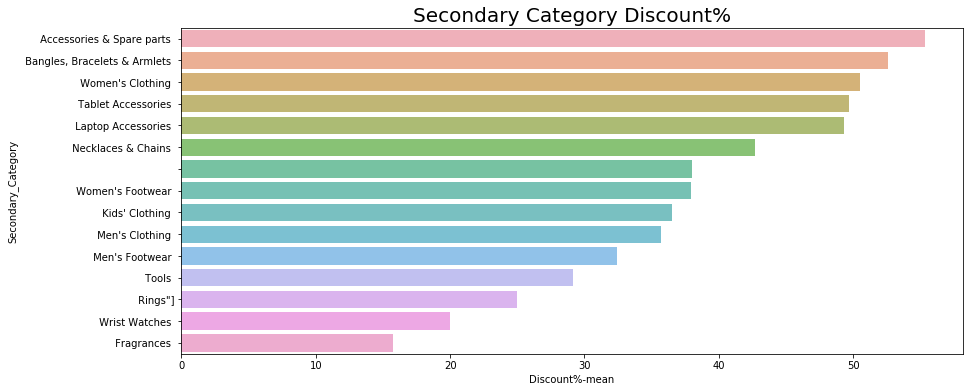

In [48]:
plt.figure(figsize=(14,6))
plt.title('Secondary Category Discount%', fontsize=20)
sns.barplot(Secondary_Category_Discounts['Discount%-mean'], Secondary_Category_Discounts['Secondary_Category'], alpha = 0.75)

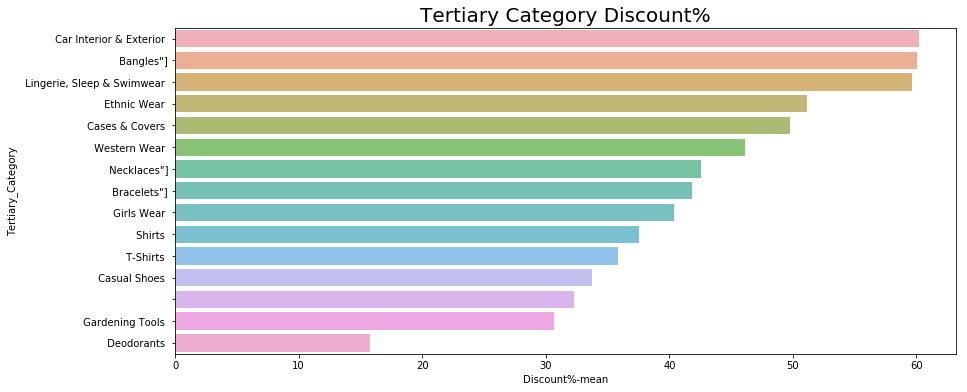

In [49]:
plt.figure(figsize=(14,6))
plt.title('Tertiary Category Discount%', fontsize=20)
sns.barplot(Tertiary_Category_Discounts['Discount%-mean'], Tertiary_Category_Discounts['Tertiary_Category'], alpha = 0.75)

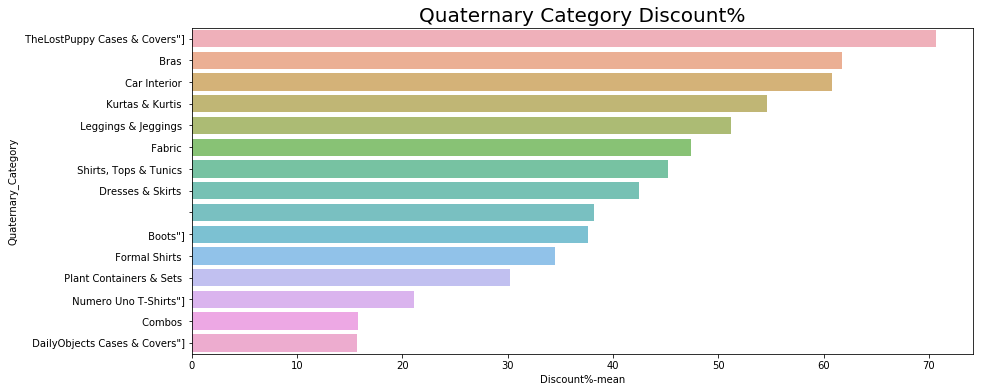

In [50]:
plt.figure(figsize=(14,6))
plt.title('Quaternary Category Discount%', fontsize=20)
sns.barplot(Quaternary_Category_Discounts['Discount%-mean'], Quaternary_Category_Discounts['Quaternary_Category'], alpha = 0.75)

#### Objective 5 : Sales Distribution across time period

In [51]:
flipkart_df.head()

,product_name,Primary_Category,retail_price,discounted_price,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
0,Alisha Solid Women's Cycling Shorts,Clothing,999.0,379.0,62.1,3,2016,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,FabHomeDecor Fabric Double Sofa Bed,Furniture,32157.0,22646.0,29.6,3,2016,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...
2,AW Bellies,Footwear,999.0,499.0,50.1,3,2016,Women's Footwear,Ballerinas,"AW Bellies""]"
3,Alisha Solid Women's Cycling Shorts,Clothing,699.0,267.0,61.8,3,2016,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,220.0,210.0,4.5,3,2016,Grooming,Skin & Coat Care,Shampoo


In [52]:
# Let us map the month numbers names of month using map function from a dictionary
months = {1 : 'January',
         2 : 'February',
         3 : 'March',
         4 : 'April',
         5 : 'May',
         6 : 'June',
         7 : 'July',
         8 : 'August',
         9 : 'September',
         10 : 'October',
         11: 'November',
         12 : 'December'}

flipkart_df['sale_month'] = flipkart_df['sale_month'].map(months)

In [53]:
flipkart_df.head()

,product_name,Primary_Category,retail_price,discounted_price,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
0,Alisha Solid Women's Cycling Shorts,Clothing,999.0,379.0,62.1,March,2016,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,FabHomeDecor Fabric Double Sofa Bed,Furniture,32157.0,22646.0,29.6,March,2016,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...
2,AW Bellies,Footwear,999.0,499.0,50.1,March,2016,Women's Footwear,Ballerinas,"AW Bellies""]"
3,Alisha Solid Women's Cycling Shorts,Clothing,699.0,267.0,61.8,March,2016,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,220.0,210.0,4.5,March,2016,Grooming,Skin & Coat Care,Shampoo


In [54]:
monthly_sales = flipkart_df['sale_month'].value_counts()
monthly_sales

December    10315
January      4850
March        1634
April        1137
June         1046
May           773
February      245
Name: sale_month, dtype: int64

### Monthly Sales Distribution

Text(0.5, 1.0, 'Products Monthly Sales')

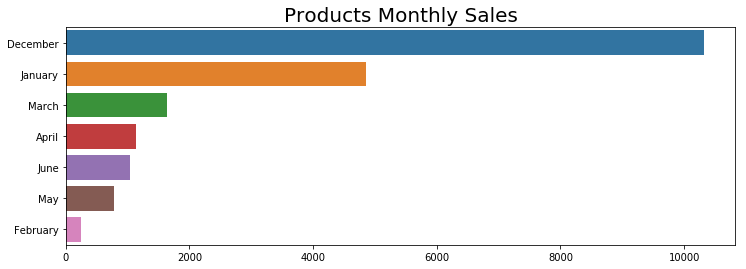

In [55]:
# Plot monthly distribution of sales
plt.figure(figsize=(12,4))
sns.barplot(monthly_sales.values, monthly_sales.index)
plt.title('Products Monthly Sales', fontsize=20)

In [56]:
yearly_sales = flipkart_df['sale_year'].value_counts()
yearly_sales

2015    10315
2016     9685
Name: sale_year, dtype: int64

### Yearly Sales Distribution

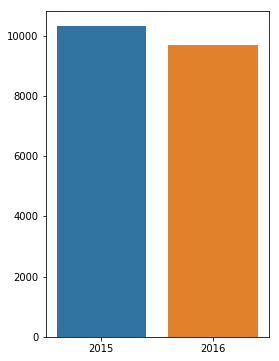

In [57]:
plt.figure(figsize=(4,6))
sns.barplot(yearly_sales.index, yearly_sales.values)

***

# Conclusion

- The data is good enough even small amounts of missing data available
- Periodacal sales distribution is achievedin years & months
- Between December & January much products were sold (People looks more interesting in buying things during New Year)
- 2015 Sales observed higher compared to 2016 sales as per the data available
- Automotive, Mobiles&Accessories, Clothing categories are having highest_discounts.
- Clothing, Jewelery & Footware are the top most sold items.